# Estadística Aplicada

Sesión 10 - 6 de Septiembre

David Eduardo Gómez Marín  -  1914352

Grupo 41

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install lifelines

In [3]:
#Librerías especializadas
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter

In [4]:
#importar datos
recaida = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv')

In [5]:
recaida

,Paciente,tiempo,estado
0,1,5,1
1,2,8,1
2,3,12,1
3,4,24,1
4,5,32,1
5,6,17,1
6,7,16,0
7,8,17,0
8,9,19,0
9,10,30,0


# Suponiendo que el tiempo de supervivncia se distribuye exponenial

In [6]:
exponencial = ExponentialFitter().fit(recaida[' tiempo'], recaida[' estado'])

In [7]:
#mostrar el modelo
exponencial.print_summary()

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 10 total observations, 4 right-censored observations>
   number of observations = 10
number of events observed = 6
           log-likelihood = -26.41
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.00      12.25             6.00            54.00

          cmp to    z    p   -log2(p)
lambda_     0.00 2.45 0.01       6.13
---
AIC = 54.81

Text(0.5, 1.0, 'Función de riesgo h(t) de una dist. Esponencial')

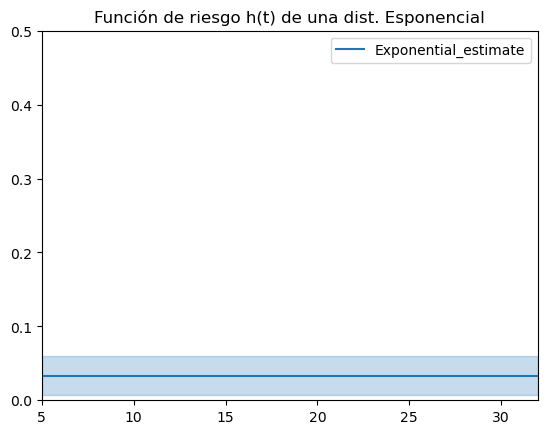

In [8]:
#Así se grafica la funcion de riesfo h(t), con funcion.plot_hazard
exponencial.plot_hazard()
plt.xlim(5,32)
plt.ylim(0,0.5)
plt.title('Función de riesgo h(t) de una dist. Esponencial')

(5.0, 32.0)

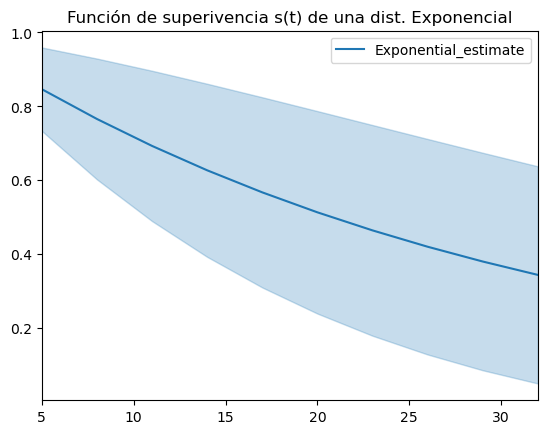

In [9]:
exponencial.plot_survival_function()
plt.title('Función de superivencia s(t) de una dist. Exponencial')
plt.xlim(5,32)

(5.0, 32.0)

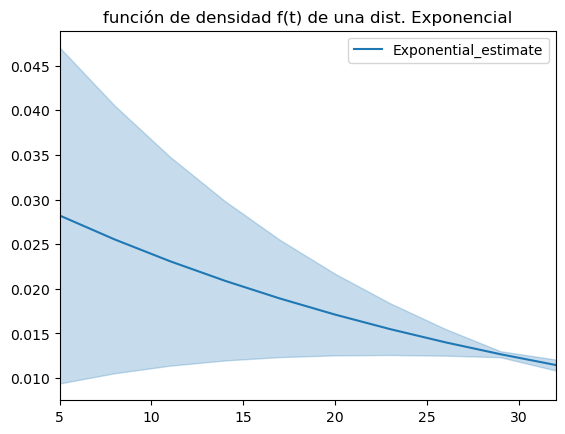

In [10]:
exponencial.plot_density()
plt.title('función de densidad f(t) de una dist. Exponencial')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max())

# Weibull
Suponiendo que el tiempo de supervivencia se distribuye Weibull

In [11]:
mWeibull = WeibullFitter().fit(recaida[' tiempo'], recaida[' estado'])

In [12]:
#Función gamma de weibull
mWeibull.rho_

#en este caso, la gamma es positiva por lo que el riesgo debería sr creciente

1.8867259500116444

(5.0, 32.0)

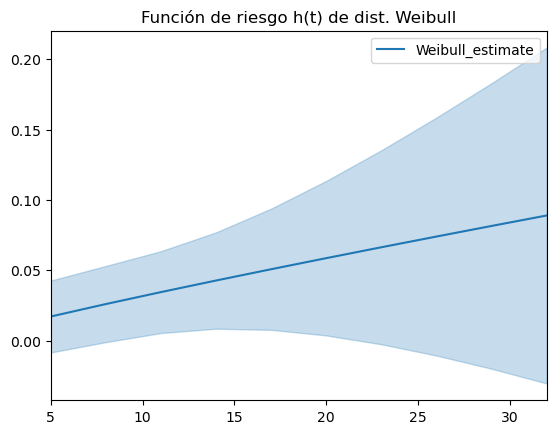

In [13]:
#Grafica h(t)
mWeibull.plot_hazard()
plt.title('Función de riesgo h(t) de dist. Weibull')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max())

(5.0, 32.0)

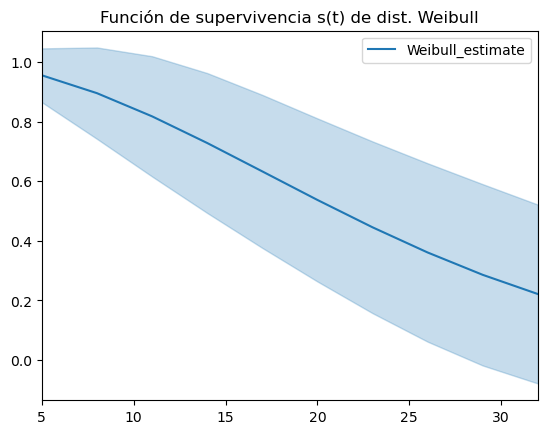

In [14]:
#Grafica s(t)
mWeibull.plot_survival_function()
plt.title('Función de supervivencia s(t) de dist. Weibull')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max())

(5.0, 32.0)

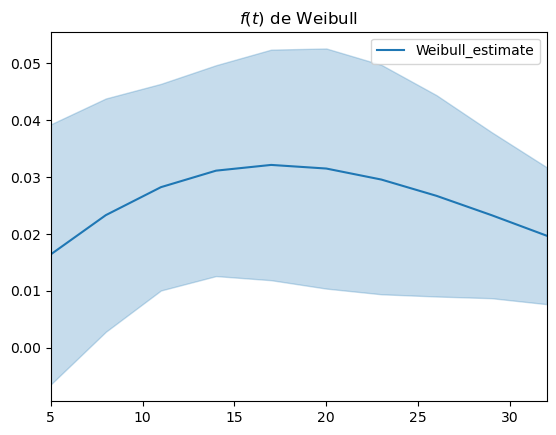

In [15]:
#Grafica f(t)
mWeibull.plot_density()
plt.title('$f(t)$ de Weibull')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max())

## Log Normal
Suponiendo que el log(tiempo) de supervivencia se distribuye Normal
la base del log es e, o bien, es ln()

In [16]:
mLogN = LogNormalFitter().fit(recaida[' tiempo'], recaida[' estado'])

(5.0, 32.0)

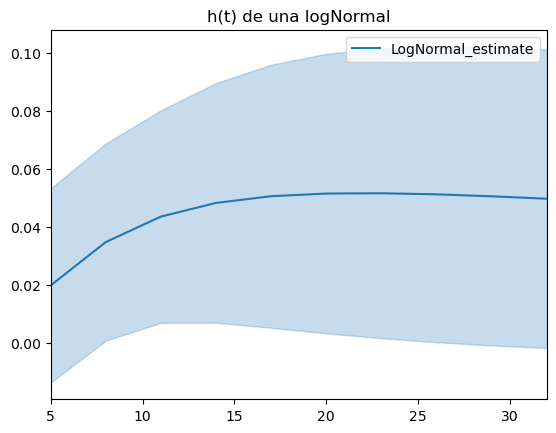

In [17]:
#Gradica de riesgo h(t)
mLogN.plot_hazard()
plt.title('h(t) de una logNormal')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max())

In [18]:
mLogN.hazard_

,LogNormal_estimate
5.0,0.019961
8.0,0.034916
11.0,0.043704
14.0,0.048408
17.0,0.050720
20.0,0.051641
23.0,0.051744
26.0,0.051361
29.0,0.050690
32.0,0.049850


**Sesión 11 - 7 de Septiembre**

(5.0, 32.0)

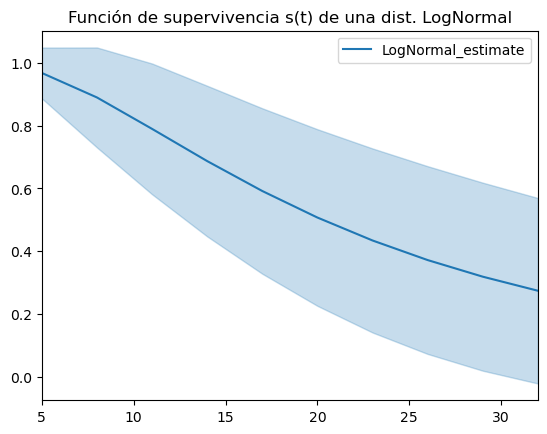

In [19]:
#funcipn de supervivencia de logNormal
mLogN.plot_survival_function()
plt.title('Función de supervivencia s(t) de una dist. LogNormal')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max())


(5.0, 32.0)

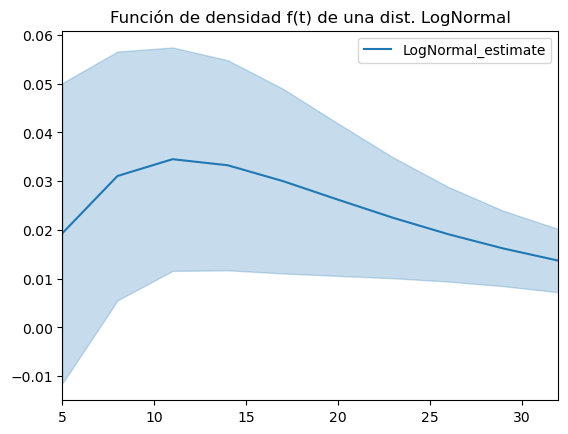

In [20]:
#Grafica de función de densidad f(t) de logNormal
mLogN.plot_density()
plt.title('Función de densidad f(t) de una dist. LogNormal')
plt.xlim(recaida[' tiempo'].min(), recaida[' tiempo'].max())

Tomamos ua base de datos de tiempo de supervivencia y spusimos que el tiempo de supervivencia se comportaba de forma:
1. exponencial
2. weibull
3. LogNormal

La pregunta es
¿Cual de estos tres modelos describen mejor el comportamiento de los datos?

Para responder vamos a usar
**El criterio de Akaike (AIC)**

$AIC = -2ln(verosimilitud) + 2k $

k = numero de parámetros en el modelo

De acuerdo con el criterio de Akaike (AIC) el "Mejor" modelo es el que tiene menor AIC. El AIC elige modelos más simpless, en el sentido de que no tienen muchos parámetros.

In [27]:
print('este es el AIC de los 3 modelos')
print('AIC modelo exponencial: ',exponencial.AIC_,',','AIC modelo Weibull: ', mWeibull.AIC_,',','AIC modelo LogNormal: ', mLogN.AIC_)

este es el AIC de los 3 modelos
AIC modelo exponencial:  54.814368579945864 , AIC modelo Weibull:  54.15994048485461 , AIC modelo LogNormal:  54.50594286745431


De acuerdo con el criterio de Akaike (AIC), el "mejor" modelo, es decir, el que mejor describe los datos de supervivencia de las recaídas de la enfermedad es el Weibull, donde el riesgo de recaer es creciente a través del tiempo